# Visualização de Dados

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [63]:
df = pd.read_csv('https://raw.githubusercontent.com/Andersontno/VisualizadorDados/main/monroe-county-car-crash-2003-2015.csv', encoding='latin-1')

In [64]:
#Formatando a hora

# Função para converter HHMM para horas decimais
def convert_to_decimal_hours(hhmm):
    hours = hhmm // 100
    minutes = hhmm % 100
    decimal_hours = hours + minutes / 60
    return decimal_hours

df['Hour'] = df['Hour'].apply(convert_to_decimal_hours)


No gráfico de barras abaixo temos a diferença de acidentes que ocrrem nos dias de semana e nos finais de semana

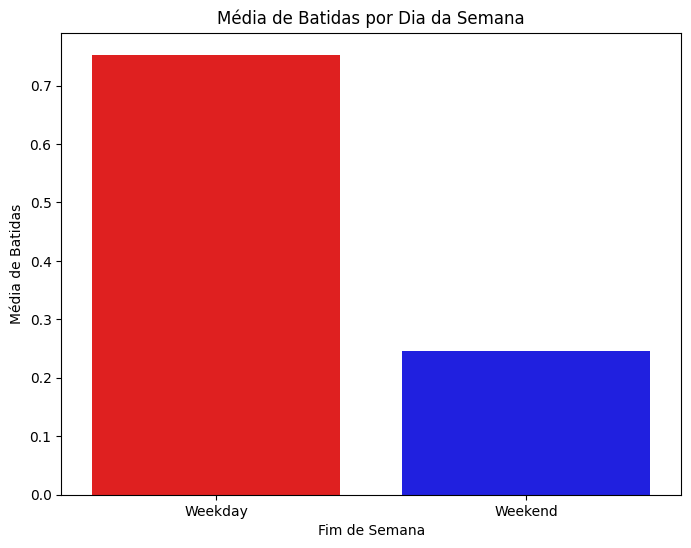

In [65]:
means = df.groupby('Weekend?')['Weekend?'].count() / len(df)

#Criando o histograma
plt.figure(figsize=(8, 6))
sns.barplot(x=means.index, y=means.values, hue=means.index, palette=['red', 'blue'])
plt.title('Média de Batidas por Dia da Semana')
plt.xlabel('Fim de Semana')
plt.ylabel('Média de Batidas')
plt.show()

No gráfico de linha abaixo temos a representação dos acidentes que ocorreram no decorrer dos anos

[Text(0.5, 1.0, 'Quantidade de acidentes por ano'),
 Text(0.5, 0, 'Ano'),
 Text(0, 0.5, 'Quantidade')]

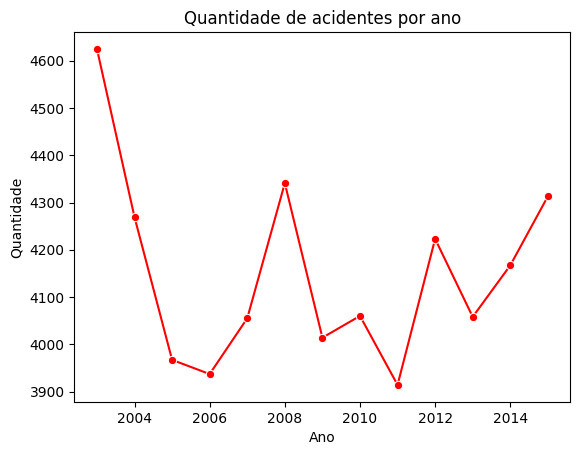

In [66]:
cont_ano = df['Year'].value_counts()
cont_ano.sort_index()

cont_meses = df['Month'].value_counts()
cont_meses.sort_index()

sns.lineplot(x=cont_ano.index, y=cont_ano.values, color='red', marker='o').set(title='Quantidade de acidentes por ano', xlabel='Ano', ylabel='Quantidade')


No gráfico de calor abaixo está representado a relação entre o tipo de colisão com os tipos de lesões

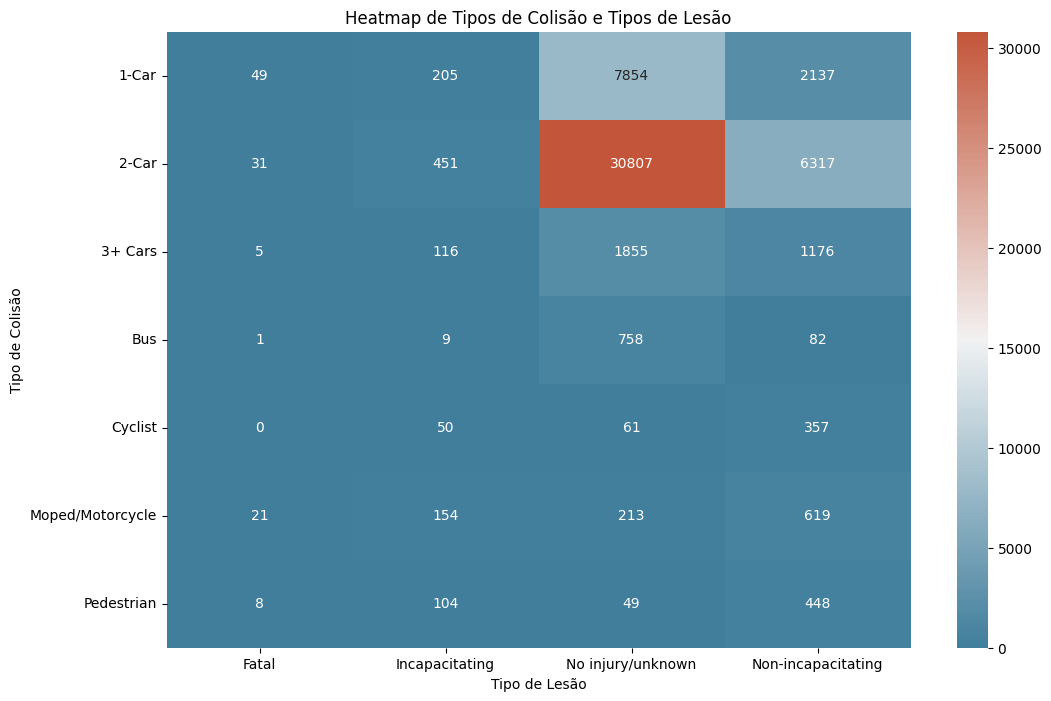

In [67]:
contingency_table = pd.crosstab(df['Collision Type'], df['Injury Type'])

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(12, 8))
sns.heatmap(contingency_table, annot=True, cmap=cmap, fmt='d')
plt.title('Heatmap de Tipos de Colisão e Tipos de Lesão')
plt.xlabel('Tipo de Lesão')
plt.ylabel('Tipo de Colisão')
plt.show()